<a href="https://colab.research.google.com/github/mpartain1/Project2CodingDojo/blob/main/Project2Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#Data Set 1
#Source of Data: UCI Machine Learning Repository

#This data set relates to the quality of "Vinho Verde" red wine.  It contains attributes such as fixed acidity, 
#chlorides, and residual sugar.

#The target is quality (score between 0 and 10)

#This is a regression problem

#12 features

#4898 rows of data

#Challenge could be trying to assess the most influential factors that predict wine quality.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.ensemble import BaggingRegressor
import seaborn as sns

set_config(display='diagram')
df = pd.read_csv('/content/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


No unnecessary columns to delete

In [4]:
df.drop_duplicates(inplace=True, keep = 'first')

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No NA values

No categorical values to address inconcistencies for

Below are univariate visualizations of the columns.


Upper Outliers:
       fixed acidity
596            12.4
338            12.4
548            12.4
510            12.4
516            12.5
409            12.5
264            12.5
339            12.5
446            12.5
472            12.5
363            12.5
814            12.6
1224           12.6
359            12.6
440            12.6
560            12.7
394            12.7
599            12.7
205            12.8
429            12.8
364            12.8
811            12.9
538            12.9
559            13.0
470            13.0
601            13.2
611            13.2
509            13.3
294            13.3
680            13.3
328            13.4
353            13.5
381            13.7
347            13.8
374            14.0
544            14.3
243            15.0
554            15.5
442            15.6
557            15.6
652            15.9
Lower Outliers:
 Empty DataFrame
Columns: [fixed acidity]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28d816790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28d821850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28d827890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28d827350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28d816d90>,
  <matplotlib.lines.Line2D at 0x7fb28d821310>]}

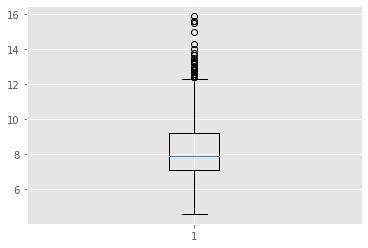

In [6]:
upper_outlier_value = 1.5*(df['fixed acidity'].describe()[6]-df['fixed acidity'].describe()[4]) + df['fixed acidity'].describe()[6]
lower_outlier_value =  df['fixed acidity'].describe()[4]-1.5*(df['fixed acidity'].describe()[6]-df['fixed acidity'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['fixed acidity']>upper_outlier_value, 'fixed acidity'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['fixed acidity']<lower_outlier_value, 'fixed acidity'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')
plt.style.use('ggplot')
plt.boxplot(df['fixed acidity'])


Upper Outliers:
       residual sugar
1138            3.70
1552            3.70
442             3.70
408             3.70
1471            3.75
...              ...
1244           13.40
1474           13.80
1574           13.90
1434           15.40
480            15.50

[126 rows x 1 columns]
Lower Outliers:
 Empty DataFrame
Columns: [residual sugar]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28d2ff110>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28d306190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28d30e1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28d306c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28d2ff6d0>,
  <matplotlib.lines.Line2D at 0x7fb28d2ffc10>]}

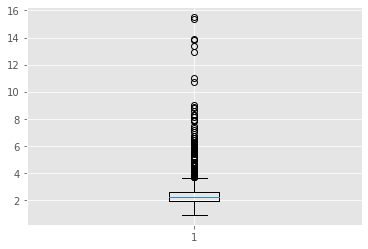

In [7]:
upper_outlier_value = 1.5*(df['residual sugar'].describe()[6]-df['residual sugar'].describe()[4]) + df['residual sugar'].describe()[6]
lower_outlier_value =  df['residual sugar'].describe()[4]-1.5*(df['residual sugar'].describe()[6]-df['residual sugar'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['residual sugar']>upper_outlier_value, 'residual sugar'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['residual sugar']<lower_outlier_value, 'residual sugar'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['residual sugar'])

Upper Outliers:
       volatile acidity
94               1.020
1261             1.020
899              1.020
700              1.020
710              1.025
705              1.035
1467             1.040
134              1.040
553              1.040
120              1.070
199              1.090
724              1.115
38               1.130
1312             1.180
690              1.185
672              1.240
127              1.330
126              1.330
1299             1.580
Lower Outliers:
 Empty DataFrame
Columns: [volatile acidity]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28d7f16d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28d2cb450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28d28c850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28d28c310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28d827090>,
  <matplotlib.lines.Line2D at 0x7fb28d942490>]}

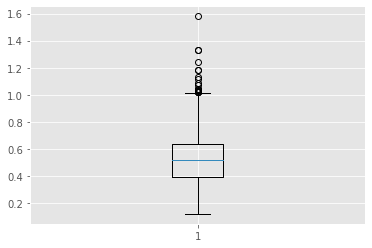

In [8]:
upper_outlier_value = 1.5*(df['volatile acidity'].describe()[6]-df['volatile acidity'].describe()[4]) + df['volatile acidity'].describe()[6]
lower_outlier_value =  df['volatile acidity'].describe()[4]-1.5*(df['volatile acidity'].describe()[6]-df['volatile acidity'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['volatile acidity']>upper_outlier_value, 'volatile acidity'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['volatile acidity']<lower_outlier_value, 'volatile acidity'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['volatile acidity'])

Upper Outliers:
      citric acid
151          1.0
Lower Outliers:
 Empty DataFrame
Columns: [citric acid]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28d205a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28d207a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28d20dad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28d20d590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28d205fd0>,
  <matplotlib.lines.Line2D at 0x7fb28d207550>]}

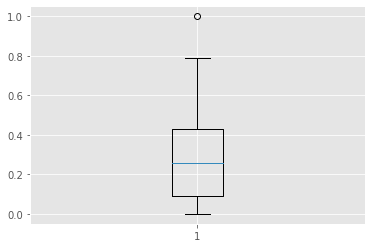

In [9]:
upper_outlier_value = 1.5*(df['citric acid'].describe()[6]-df['citric acid'].describe()[4]) + df['citric acid'].describe()[6]
lower_outlier_value =  df['citric acid'].describe()[4]-1.5*(df['citric acid'].describe()[6]-df['citric acid'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['citric acid']>upper_outlier_value, 'citric acid'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['citric acid']<lower_outlier_value, 'citric acid'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['citric acid'])

Upper Outliers:
       chlorides
1020      0.123
1423      0.123
1258      0.123
1252      0.123
624       0.124
...         ...
692       0.422
81        0.464
106       0.467
151       0.610
258       0.611

[83 rows x 1 columns]
Lower Outliers:
       chlorides
836       0.012
695       0.034
797       0.038
1571      0.038


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28d1fb650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28d1806d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28d187710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28d1871d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28d1fbc10>,
  <matplotlib.lines.Line2D at 0x7fb28d180190>]}

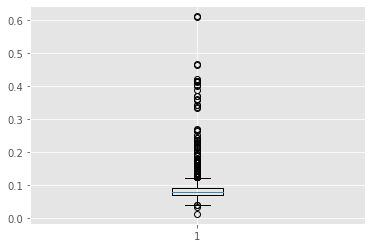

In [10]:
upper_outlier_value = 1.5*(df['chlorides'].describe()[6]-df['chlorides'].describe()[4]) + df['chlorides'].describe()[6]
lower_outlier_value =  df['chlorides'].describe()[4]-1.5*(df['chlorides'].describe()[6]-df['chlorides'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['chlorides']>upper_outlier_value, 'chlorides'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['chlorides']<lower_outlier_value, 'chlorides'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['chlorides'])

Upper Outliers:
       free sulfur dioxide
1217                 43.0
1256                 43.0
497                  43.0
1075                 45.0
1156                 45.0
678                  45.0
634                  46.0
522                  47.0
1231                 48.0
1474                 48.0
1175                 48.0
57                   50.0
1154                 50.0
1295                 51.0
982                  51.0
15                   51.0
1358                 52.0
14                   52.0
926                  52.0
925                  53.0
584                  54.0
1434                 55.0
1131                 57.0
1558                 66.0
396                  68.0
1244                 72.0
Lower Outliers:
 Empty DataFrame
Columns: [free sulfur dioxide]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28d16e410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28d173490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28d17b4d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28d173f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28d16e9d0>,
  <matplotlib.lines.Line2D at 0x7fb28d16ef10>]}

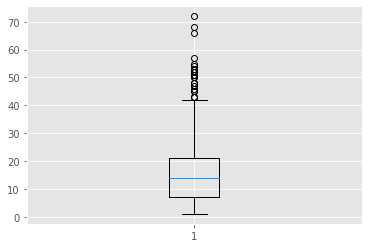

In [11]:
upper_outlier_value = 1.5*(df['free sulfur dioxide'].describe()[6]-df['free sulfur dioxide'].describe()[4]) + df['free sulfur dioxide'].describe()[6]
lower_outlier_value =  df['free sulfur dioxide'].describe()[4]-1.5*(df['free sulfur dioxide'].describe()[6]-df['free sulfur dioxide'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['free sulfur dioxide']>upper_outlier_value, 'free sulfur dioxide'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['free sulfur dioxide']<lower_outlier_value, 'free sulfur dioxide'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['free sulfur dioxide'])

Upper Outliers:
       total sulfur dioxide
88                   125.0
694                  125.0
192                  126.0
723                  127.0
190                  127.0
155                  128.0
463                  129.0
154                  129.0
791                  130.0
1559                 131.0
1419                 133.0
522                  133.0
92                   133.0
130                  134.0
415                  134.0
313                  135.0
1131                 135.0
86                   136.0
741                  139.0
90                   140.0
145                  141.0
1400                 141.0
523                  142.0
771                  143.0
188                  143.0
189                  144.0
219                  144.0
772                  144.0
14                   145.0
637                  145.0
201                  145.0
636                  147.0
1493                 147.0
15                   148.0
649                  148.0
591        

{'boxes': [<matplotlib.lines.Line2D at 0x7fb28d0e6110>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28d0ee190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28d0f71d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28d0eec50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28d0e66d0>,
  <matplotlib.lines.Line2D at 0x7fb28d0e6c10>]}

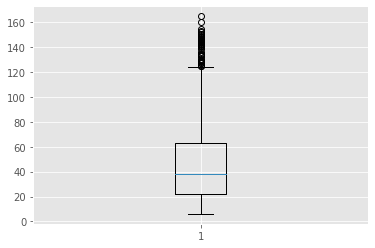

In [12]:
upper_outlier_value = 1.5*(df['total sulfur dioxide'].describe()[6]-df['total sulfur dioxide'].describe()[4]) + df['total sulfur dioxide'].describe()[6]
lower_outlier_value =  df['total sulfur dioxide'].describe()[4]-1.5*(df['total sulfur dioxide'].describe()[6]-df['total sulfur dioxide'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['total sulfur dioxide']>upper_outlier_value, 'total sulfur dioxide'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['total sulfur dioxide']<lower_outlier_value, 'total sulfur dioxide'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')
df.drop([1079, 1081], inplace=True)

plt.style.use('ggplot')
plt.boxplot(df['total sulfur dioxide'])

Upper Outliers:
       density
294   1.00140
374   1.00140
381   1.00140
415   1.00140
538   1.00140
324   1.00150
353   1.00180
559   1.00210
364   1.00220
1474  1.00242
608   1.00260
480   1.00260
889   1.00289
554   1.00315
557   1.00315
442   1.00320
1434  1.00369
Lower Outliers:
       density
1017  0.99007
1114  0.99020
836   0.99064
1269  0.99080
1270  0.99084
354   0.99120
1126  0.99150
821   0.99154
1228  0.99157
142   0.99160
999   0.99162
588   0.99170
1475  0.99182
1477  0.99182
1298  0.99191
695   0.99210
1122  0.99220
591   0.99220


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28d061550>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28d0675d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28d06e610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28d06e0d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28d061b10>,
  <matplotlib.lines.Line2D at 0x7fb28d067090>]}

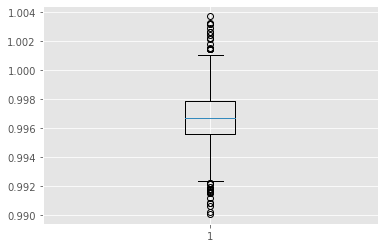

In [13]:
upper_outlier_value = 1.5*(df['density'].describe()[6]-df['density'].describe()[4]) + df['density'].describe()[6]
lower_outlier_value =  df['density'].describe()[4]-1.5*(df['density'].describe()[6]-df['density'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['density']>upper_outlier_value, 'density'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['density']<lower_outlier_value, 'density'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['density'])

Upper Outliers:
         pH
930   3.69
268   3.69
1270  3.70
996   3.71
1377  3.71
821   3.71
1488  3.72
588   3.72
553   3.74
94    3.75
1111  3.78
1300  3.78
95    3.85
695   3.90
45    3.90
1316  4.01
1321  4.01
Lower Outliers:
         pH
151   2.74
544   2.86
614   2.87
440   2.88
1470  2.88
650   2.89
1017  2.89
1319  2.90
554   2.92
557   2.92
657   2.92


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28cfde6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28cfe2750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28cfe9790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28cfe9250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28cfdec90>,
  <matplotlib.lines.Line2D at 0x7fb28cfe2210>]}

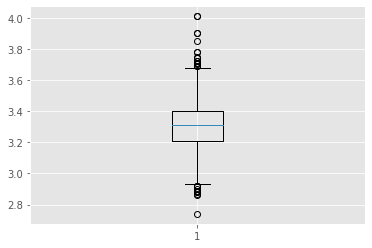

In [14]:
upper_outlier_value = 1.5*(df['pH'].describe()[6]-df['pH'].describe()[4]) + df['pH'].describe()[6]
lower_outlier_value =  df['pH'].describe()[4]-1.5*(df['pH'].describe()[6]-df['pH'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['pH']>upper_outlier_value, 'pH'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['pH']<lower_outlier_value, 'pH'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['pH'])

Upper Outliers:
       sulphates
338        1.00
1408       1.01
586        1.02
506        1.02
181        1.02
1371       1.03
201        1.03
503        1.04
372        1.04
689        1.05
504        1.05
482        1.05
754        1.06
483        1.06
477        1.06
451        1.06
852        1.07
415        1.07
281        1.08
161        1.08
19         1.08
240        1.09
1403       1.10
1165       1.10
376        1.11
79         1.12
369        1.13
515        1.14
83         1.14
1260       1.15
1158       1.16
1288       1.17
692        1.17
1370       1.17
1367       1.18
795        1.18
340        1.18
43         1.20
88         1.22
258        1.26
81         1.28
17         1.28
106        1.31
1319       1.33
1051       1.34
614        1.36
339        1.36
639        1.36
13         1.56
169        1.59
226        1.61
723        1.62
86         1.95
92         1.98
151        2.00
Lower Outliers:
 Empty DataFrame
Columns: [sulphates]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28cf54ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28cf5af50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28cf62f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28cf62a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28cf5a4d0>,
  <matplotlib.lines.Line2D at 0x7fb28cf5aa10>]}

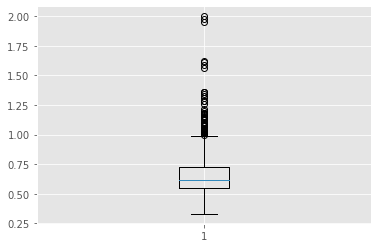

In [15]:
upper_outlier_value = 1.5*(df['sulphates'].describe()[6]-df['sulphates'].describe()[4]) + df['sulphates'].describe()[6]
lower_outlier_value =  df['sulphates'].describe()[4]-1.5*(df['sulphates'].describe()[6]-df['sulphates'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['sulphates']>upper_outlier_value, 'sulphates'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['sulphates']<lower_outlier_value, 'sulphates'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['sulphates'])

Upper Outliers:
         alcohol
1475  13.566667
1114  13.600000
1132  13.600000
1228  13.600000
1477  13.600000
142   14.000000
467   14.000000
588   14.000000
821   14.000000
1269  14.000000
1270  14.000000
652   14.900000
Lower Outliers:
 Empty DataFrame
Columns: [alcohol]
Index: []


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28cecfcd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28ced3d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28cedad90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28ceda850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28ced32d0>,
  <matplotlib.lines.Line2D at 0x7fb28ced3810>]}

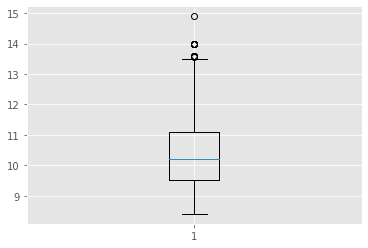

In [16]:
upper_outlier_value = 1.5*(df['alcohol'].describe()[6]-df['alcohol'].describe()[4]) + df['alcohol'].describe()[6]
lower_outlier_value =  df['alcohol'].describe()[4]-1.5*(df['alcohol'].describe()[6]-df['alcohol'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['alcohol']>upper_outlier_value, 'alcohol'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['alcohol']<lower_outlier_value, 'alcohol'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['alcohol'])

Upper Outliers:
       quality
267         8
1403        8
1269        8
1202        8
1120        8
1090        8
1061        8
1449        8
828         8
495         8
481         8
455         8
440         8
390         8
278         8
588         8
1549        8
Lower Outliers:
       quality
459         3
517         3
690         3
832         3
899         3
1299        3
1374        3
1469        3
1478        3
1505        3


{'boxes': [<matplotlib.lines.Line2D at 0x7fb28ce497d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb28ce4e850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb28ce558d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb28ce55350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb28ce49d90>,
  <matplotlib.lines.Line2D at 0x7fb28ce4e310>]}

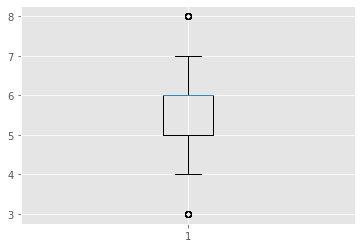

In [17]:
upper_outlier_value = 1.5*(df['quality'].describe()[6]-df['quality'].describe()[4]) + df['quality'].describe()[6]
lower_outlier_value =  df['quality'].describe()[4]-1.5*(df['quality'].describe()[6]-df['quality'].describe()[4])
upper_outliers = pd.DataFrame(df.loc[df['quality']>upper_outlier_value, 'quality'].sort_values(ascending=True))
lower_outliers = pd.DataFrame(df.loc[df['quality']<lower_outlier_value, 'quality'].sort_values(ascending=True))
print(f'Upper Outliers:\n {upper_outliers}')
print(f'Lower Outliers:\n {lower_outliers}')

plt.style.use('ggplot')
plt.boxplot(df['quality'])

Sources: Geeks for Geeks, statology, w3schools, Learn Platform, towardsDev.com, shishirkant.com, datatofish.com, datasciencemadesimple.com 

In [30]:
y = df['quality']
X = df.drop(columns = 'quality')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


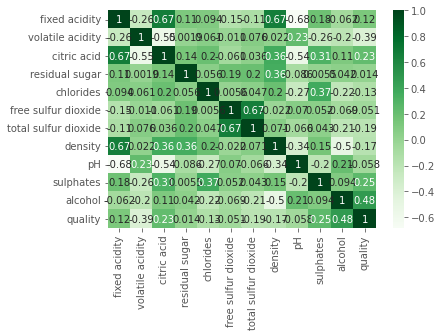

In [32]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

From the above correlation plot, we can see that alcohol levels have the highest correlation with quality, followed by sulphates and citric acid.  Additionally, there is a strong correlation of the fixed acidity feature with the density and citric acid features.

1.0
-0.014397575145238761


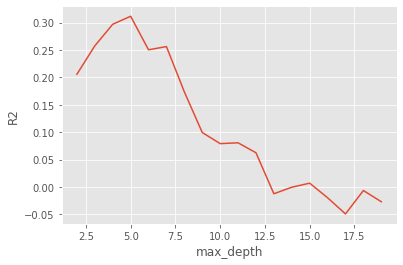

In [25]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)
# List of values to try for max_depth:
depths = list(range(2, 20)) # will try every value between 2 and 20
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_test, y_test)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

From this graph, we can see that when a basic regression tree model is used, the most optimal depth used to achieve the best R^2 value is 5.

0.8951096878510757
0.39221015407931303


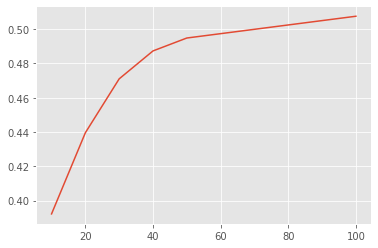

0.9255495311991433
0.4900829502399596


In [29]:
bagreg = BaggingRegressor(random_state = 42)
bagreg.fit(X_train, y_train)
bagreg.predict(X_test)
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)
# List of estimator values
estimators = [10, 20, 30, 40, 50, 100]
# Data frame to store the scores
scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
# Iterate through the values to find the best number of estimators
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   train_score = bag_reg.score(X_train, y_train)
   test_score = bag_reg.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score
  
plt.plot(scores['Test Score'])
plt.show()

scores = scores.sort_values(by='Test Score', ascending=False)
scores

# Save the index value of the best test score.
best_n_estimators = scores.index[0]
# Instantiate and fit the best version of the model
bag_reg_tuned = BaggingRegressor(n_estimators=best_n_estimators,)
bag_reg_tuned.fit(X_train, y_train)
# Evaluate the model
print(bag_reg_tuned.score(X_train, y_train))
print(bag_reg_tuned.score(X_test, y_test))

From this graph, we can see that the best estimator value for achieving highest regression score is 100.